In [2]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./data/pokemon.csv', error_bad_lines=False)
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [4]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [5]:
df.isnull().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [6]:
summary = df.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


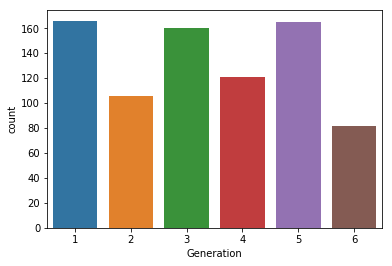

In [7]:
sns.countplot(df['Generation'])

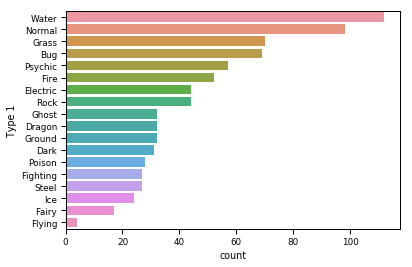

In [8]:
sns.set_context('paper')
sns.countplot(y='Type 1', data=df, order=df['Type 1'].value_counts().index, )

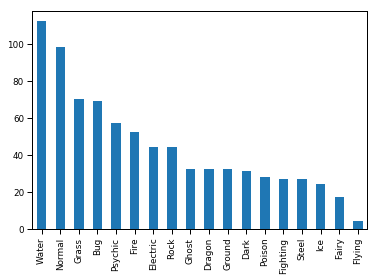

In [9]:
df['Type 1'].value_counts().plot(kind='bar')

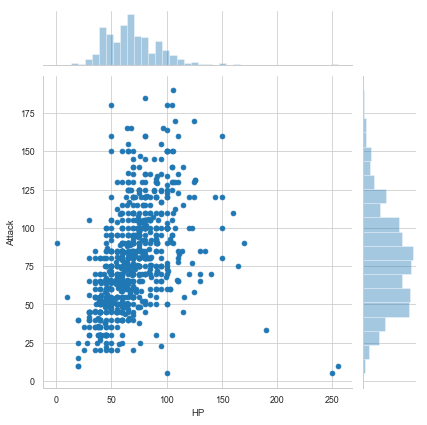

In [10]:
sns.set_context('paper')
sns.set_style("whitegrid")
sns.jointplot(x='HP', y='Attack', data=df)

<Figure size 720x720 with 0 Axes>

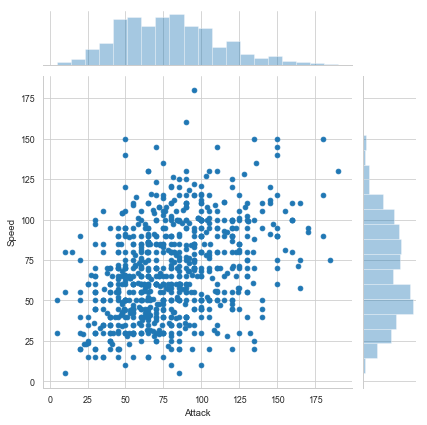

In [11]:
sns.set_context('paper')
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,10))
ax = sns.jointplot(x='Attack', y='Speed', data=df)

In [12]:
df.loc[(df['Attack'] > 85) & (df['Speed'] > 170)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


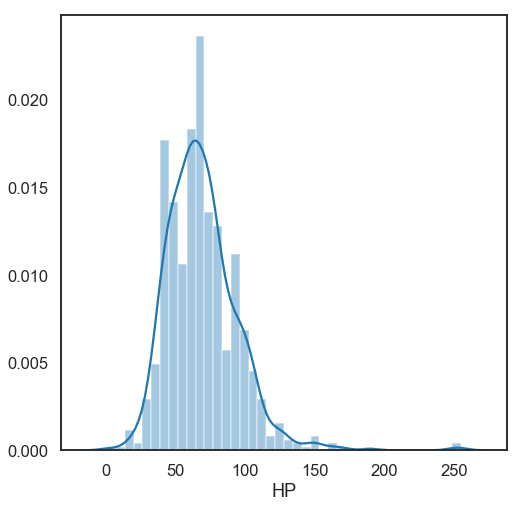

In [13]:
sns.set_context('talk')
sns.set_style("white")
fig = plt.figure(figsize=(8,8))
ax = sns.distplot(df['HP'])

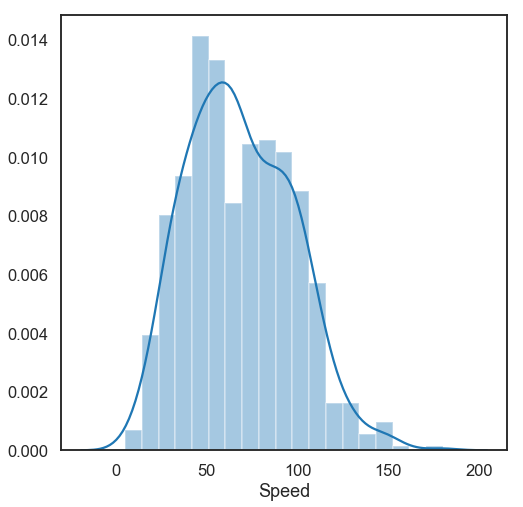

In [14]:
sns.set_context('talk')
sns.set_style("white")
fig = plt.figure(figsize=(8,8))
ax = sns.distplot(df['Speed'])

In [15]:
df.sort_values('Speed', ascending=True).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False


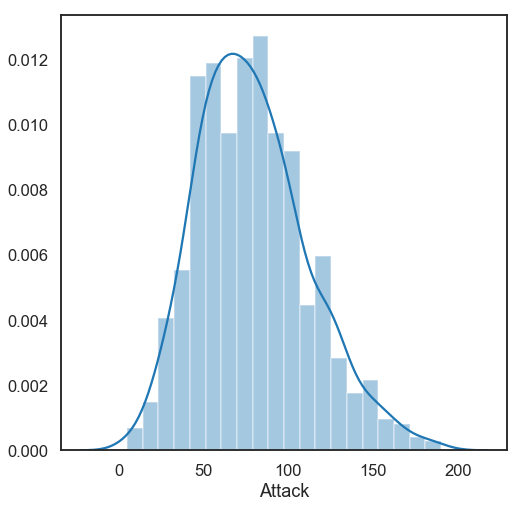

In [16]:
sns.set_context('talk')
sns.set_style("white")
fig = plt.figure(figsize=(8,8))
ax = sns.distplot(df['Attack'])

In [17]:
# Seems inefficient to sort a whole dataframe so work around below.
df.sort_values('Attack', ascending=True).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


In [18]:
df['Attack'].min()

5

In [19]:
df.loc[df['Attack'] == 5]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


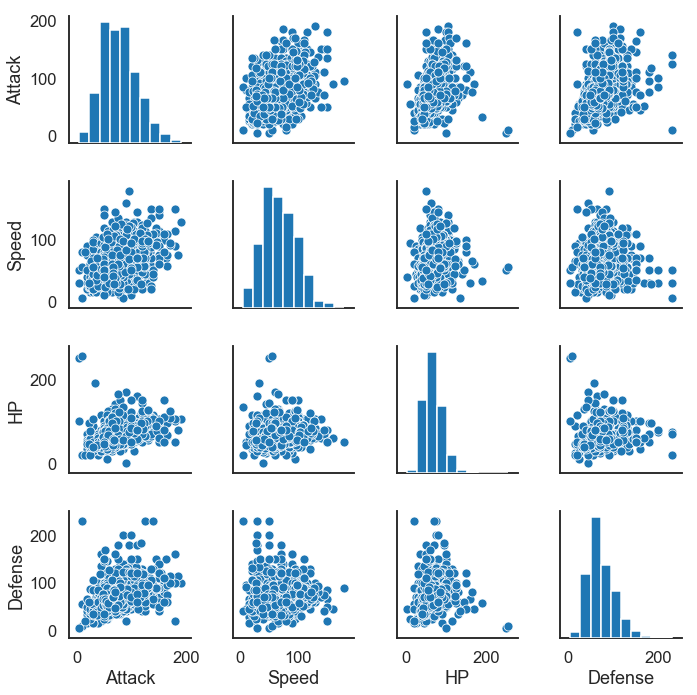

In [20]:
sns.pairplot(df[['Attack', 'Speed', 'HP', 'Defense']])

In [30]:
df.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

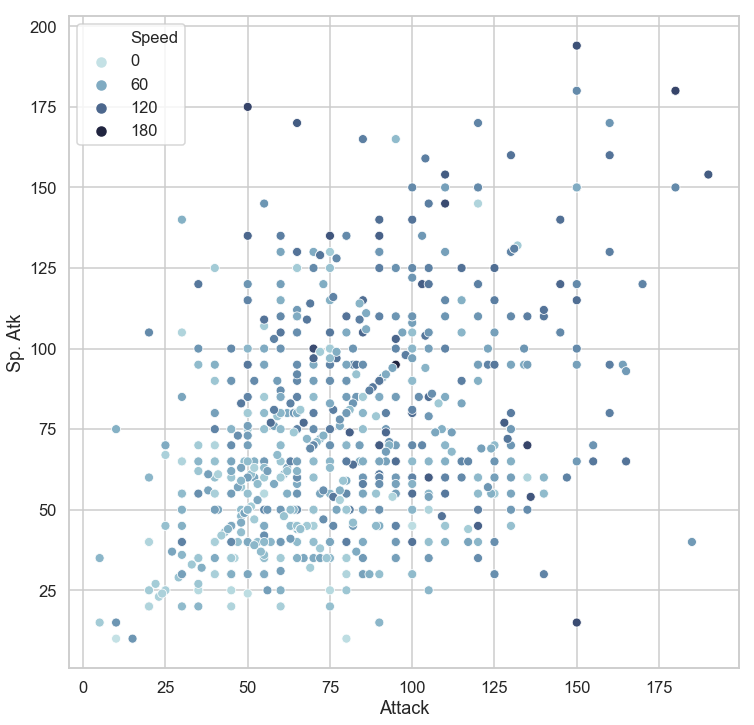

In [66]:
sns.set_context('talk')
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,12))
cmap = sns.cubehelix_palette(rot=-0.2, as_cmap=True)
ax = sns.scatterplot(x="Attack", y="Sp. Atk",
                    hue="Speed", palette=cmap, data=df)

In [67]:
df['Attack'].max()

190

In [59]:
df.loc[df['Attack'] == 190]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [64]:
df.sort_values('Attack', ascending=False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
387,354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
454,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False


In [68]:
df['Speed'].max()

180

In [70]:
df.loc[df['Speed'] == 180]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


In [72]:
df.sort_values('Speed', ascending=False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
678,617,Accelgor,Bug,NaN,495,80,70,40,100,60,145,5,False
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [74]:
df['Sp. Atk'].max()

194

In [76]:
df.loc[df['Sp. Atk'] == 194]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [77]:
df.sort_values('Sp. Atk', ascending=False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
